<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

1. membuat dataset kustom

In [ ]:
# Misalkan dataset Anda bernama 'gizi.excel'
import pandas as pd
gizi = pd.read_excel('/content/gizi2023.xlsx')

# Menampilkan DataFrame
print(gizi.head())

   Jenis Kelamin  Tahun (usia saat ukur)  Tinggi  ZS TB/U    TB/U
0              1                    0.39    67.0     1.57  Normal
1              2                    0.63    67.0    -1.44  Normal
2              2                    0.74    67.0    -2.23  Pendek
3              1                    0.51    68.0    -1.68  Normal
4              2                    0.63    69.0    -0.51  Normal


In [ ]:
# Menampilkan beberapa baris pertama dari dataset
print(gizi.head())

   Jenis Kelamin  Tahun (usia saat ukur)  Tinggi  ZS TB/U    TB/U
0              1                    0.39    67.0     1.57  Normal
1              2                    0.63    67.0    -1.44  Normal
2              2                    0.74    67.0    -2.23  Pendek
3              1                    0.51    68.0    -1.68  Normal
4              2                    0.63    69.0    -0.51  Normal


Menentukan Nama Target dari Dataset

In [ ]:
import pandas as pd

# Misalnya, data adalah DataFrame yang sudah dimuat
# Target adalah nama kolom yang berisi label kelas
target_names = gizi['TB/U'].unique()
print(target_names)

['Normal' 'Pendek' 'Sangat Pendek' 'Tinggi']


In [ ]:
# Menentukan nama-nama kelas secara manual
target_names = ['Normal' 'Pendek' 'Sangat Pendek' 'Tinggi']

In [ ]:
# Muat dataset status gizi

X = gizi.drop(columns=['TB/U'])
y = gizi['TB/U']

In [ ]:
X.shape

(1775, 4)

In [ ]:
X

,Jenis Kelamin,Tahun (usia saat ukur),Tinggi,ZS TB/U
0,1,0.39,67.0,1.57
1,2,0.63,67.0,-1.44
2,2,0.74,67.0,-2.23
3,1,0.51,68.0,-1.68
4,2,0.63,69.0,-0.51
...,...,...,...,...
1770,2,0.00,49.0,-1.20
1771,1,0.00,49.0,-1.23
1772,2,0.00,49.0,-2.41
1773,1,0.00,49.0,-0.08


In [ ]:
y.shape

(1775,)

In [ ]:
y

,TB/U
0,Normal
1,Normal
2,Pendek
3,Normal
4,Normal
...,...
1770,Normal
1771,Normal
1772,Pendek
1773,Normal


view some gizi data at the beginning and end

2. meneliti dataset

In [ ]:
import pandas as pd

# Define columns (replace with actual column names if needed)
columns = ["Jenis Kelamin", "Tahun", "Bulan", "Umur", "TB/U"]

# Use the existing DataFrame 'gizi' and provide column names
gizi = pd.DataFrame(data=gizi.values, columns=columns)

# Display dimensions
print(gizi.shape)

(1775, 5)


In [ ]:
#Membaca Data
gizi = pd.read_excel('/content/gizi2023.xlsx')
gizi.head()

,Jenis Kelamin,Tahun (usia saat ukur),Tinggi,ZS TB/U,TB/U
0,1,0.39,67.0,1.57,Normal
1,2,0.63,67.0,-1.44,Normal
2,2,0.74,67.0,-2.23,Pendek
3,1,0.51,68.0,-1.68,Normal
4,2,0.63,69.0,-0.51,Normal


In [ ]:
#mengetahui type setiap atribut
gizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jenis Kelamin           1775 non-null   int64  
 1   Tahun (usia saat ukur)  1775 non-null   float64
 2   Tinggi                  1775 non-null   float64
 3   ZS TB/U                 1775 non-null   float64
 4   TB/U                    1775 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 69.5+ KB


In [ ]:
#mengecek apakah ada data kosong
gizi.empty

False

In [ ]:
gizi.head()

,Jenis Kelamin,Tahun (usia saat ukur),Tinggi,ZS TB/U,TB/U
0,1,0.39,67.0,1.57,Normal
1,2,0.63,67.0,-1.44,Normal
2,2,0.74,67.0,-2.23,Pendek
3,1,0.51,68.0,-1.68,Normal
4,2,0.63,69.0,-0.51,Normal


In [ ]:
gizi.tail()

,Jenis Kelamin,Tahun (usia saat ukur),Tinggi,ZS TB/U,TB/U
1770,2,0.0,49.0,-1.20,Normal
1771,1,0.0,49.0,-1.23,Normal
1772,2,0.0,49.0,-2.41,Pendek
1773,1,0.0,49.0,-0.08,Normal
1774,1,0.0,49.0,-0.08,Normal


In [ ]:
gizi

,Jenis Kelamin,Tahun (usia saat ukur),Tinggi,ZS TB/U,TB/U
0,1,0.39,67.0,1.57,Normal
1,2,0.63,67.0,-1.44,Normal
2,2,0.74,67.0,-2.23,Pendek
3,1,0.51,68.0,-1.68,Normal
4,2,0.63,69.0,-0.51,Normal
...,...,...,...,...,...
1770,2,0.00,49.0,-1.20,Normal
1771,1,0.00,49.0,-1.23,Normal
1772,2,0.00,49.0,-2.41,Pendek
1773,1,0.00,49.0,-0.08,Normal


3. Pra-Pemrosesan Data

In [ ]:
gizi.describe()

,Jenis Kelamin,Tahun (usia saat ukur),Tinggi,ZS TB/U
count,1775.000000,1775.000000,1775.000000,1775.000000
mean,1.520563,2.717842,88.086761,-0.832141
std,0.499718,1.336841,12.596863,1.342986
min,1.000000,0.000000,48.000000,-9.440000
25%,1.000000,1.620000,80.050000,-1.570000
50%,2.000000,2.800000,90.000000,-1.000000
75%,2.000000,3.850000,97.450000,-0.290000
max,2.000000,5.590000,116.900000,17.970000


In [ ]:
# Cek apakah ada nilai NaN
print(gizi.isna().sum())

Tahun                     0
Tahun (usia saat ukur)    0
Tinggi                    0
ZS TB/U                   0
TB/U                      0
dtype: int64


In [ ]:
#mengecek apakah ada data kosong
gizi.empty

False

In [ ]:
#Menstandarisasi atau Normalisasi Data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()


4. Membagi Data untuk Pelatihan dan Pengujian

In [ ]:
# Bagi data menjadi data pelatihan (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1420, 4)

In [ ]:
X_train

,Tahun,Tahun (usia saat ukur),Tinggi,ZS TB/U
1040,2,4.70,99.0,-2.01
198,2,1.43,77.8,-1.39
15,2,0.93,74.0,-0.40
265,2,3.00,92.7,-0.92
817,1,0.90,69.9,-1.14
...,...,...,...,...
1130,1,2.58,90.0,-0.42
1294,1,3.42,95.0,-0.86
860,1,3.12,89.0,-1.82
1459,1,3.01,84.8,-2.71


In [ ]:
X_test.shape

(355, 4)

In [ ]:
X_test

,Tahun,Tahun (usia saat ukur),Tinggi,ZS TB/U
65,2,2.53,85.7,-1.91
1096,2,1.72,80.2,-1.64
1027,2,3.92,96.7,-1.48
342,2,3.78,101.0,-0.22
557,1,3.75,94.8,-1.48
...,...,...,...,...
1764,1,0.00,49.0,-0.08
1004,1,2.57,91.6,0.06
741,1,4.76,106.0,-0.41
415,2,3.84,101.0,-0.33


In [ ]:
y_train.shape

(1420,)

In [ ]:
y_train

,TB/U
1040,Pendek
198,Normal
15,Normal
265,Normal
817,Normal
...,...
1130,Normal
1294,Normal
860,Normal
1459,Pendek


In [ ]:
y_test.shape

(355,)

In [ ]:
y_test

,TB/U
65,Normal
1096,Normal
1027,Normal
342,Normal
557,Normal
...,...
1764,Normal
1004,Normal
741,Normal
415,Normal


5. Membangun dan Melatih Model

In [ ]:
# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

In [ ]:
# Latih model dengan data pelatihan
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

6. Menyimpan dan Memuat Model

In [ ]:
# Lakukan prediksi pada data uji
y_pred = naive_bayes_model.predict(X_test)

In [ ]:
y_pred.shape

(355,)

In [ ]:
y_pred

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Pendek', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Tinggi',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Sangat Pendek', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Pendek', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Pendek', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Pendek', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal'

Calculate model accuracy

In [ ]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9577464788732394


In [ ]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

       Normal       0.96      0.99      0.98       319
       Pendek       1.00      0.65      0.79        26
Sangat Pendek       0.60      0.43      0.50         7
       Tinggi       1.00      1.00      1.00         3

     accuracy                           0.96       355
    macro avg       0.89      0.77      0.82       355
 weighted avg       0.96      0.96      0.95       355



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[317,   0,   2,   0],
       [  9,  17,   0,   0],
       [  4,   0,   3,   0],
       [  0,   0,   0,   3]])

In [ ]:
# 2. Misalkan kolom 'actual' adalah label sebenarnya dan kolom 'predicted' adalah prediksi model
y_test = gizi #label sebenarnya dari data test
y_pred = gizi #Label sebenarnya model pada data test

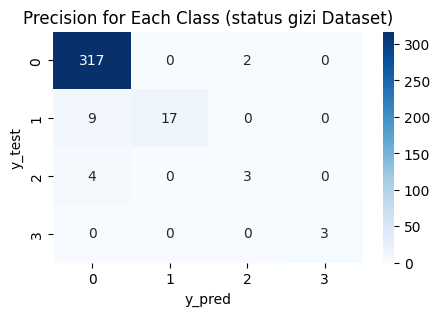

In [ ]:
# 4. Visualisasi Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Precision for Each Class (status gizi Dataset)')
plt.show()

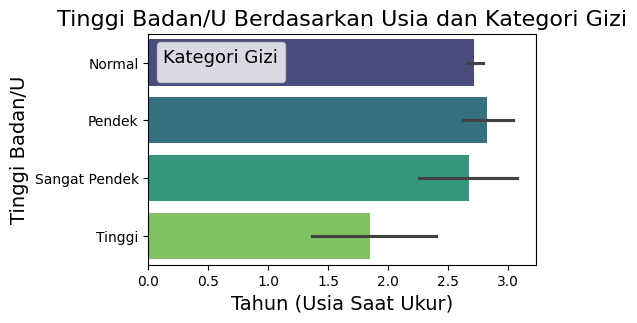

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))  # Menyesuaikan ukuran gambar
sns.barplot(x=gizi['Tahun (usia saat ukur)'], y=gizi['TB/U'],
            hue=gizi['TB/U'], palette="viridis")

plt.title("Tinggi Badan/U Berdasarkan Usia dan Kategori Gizi", fontsize=16)
plt.xlabel("Tahun (Usia Saat Ukur)", fontsize=14)
plt.ylabel("Tinggi Badan/U", fontsize=14)
plt.legend(title="Kategori Gizi", fontsize=12, title_fontsize='13')

plt.show()


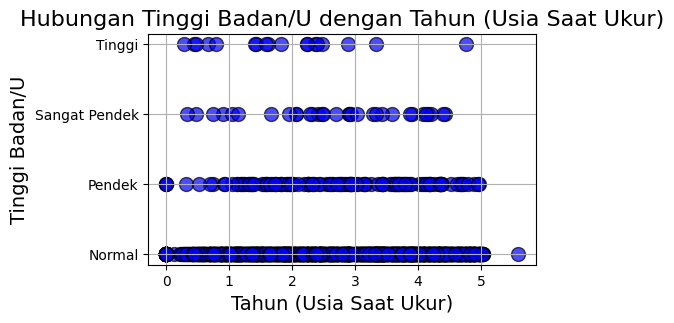

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))  # Menyesuaikan ukuran gambar
plt.scatter(gizi['Tahun (usia saat ukur)'], gizi['TB/U'],
            c='blue', s=100, edgecolor='k', alpha=0.7)  # Mengatur warna, ukuran, dan transparansi

plt.title("Hubungan Tinggi Badan/U dengan Tahun (Usia Saat Ukur)", fontsize=16)
plt.xlabel("Tahun (Usia Saat Ukur)", fontsize=14)
plt.ylabel("Tinggi Badan/U", fontsize=14)

plt.grid(True)  # Menambahkan grid
plt.show()
